# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre: Jesús Armando Cañas Gamboa

Identificación: 1093855087

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [1]:
# Librerias útiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Ridder** es un algoritmo de búsqueda de raíces que, como la bisección, requiere un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. A diferencia de la bisección, Ridder introduce una corrección exponencial para acelerar la convergencia, logrando **convergencia cuadrática** sin requerir derivadas.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ y un intervalo $[a, b]$ tal que:

   - $f(a) \cdot f(b) < 0$ (la función tiene signos opuestos en los extremos del intervalo).
   - La función debe ser continua en $[a, b]$.

2. **Calcular el punto medio**:

   $$
   m = \frac{a + b}{2}
   $$

3. **Calcular la corrección exponencial**:

   - Evaluar $f(a)$, $f(b)$ y $f(m)$.
   - Calcular:

     $$
     s = \sqrt{f(m)^2 - f(a) f(b)}
     $$

   - Si $s = 0$, detener: la raíz no puede estimarse en esta iteración.

   - Calcular el nuevo candidato a raíz:

     $$
     x = m + \frac{(m - a) f(m)}{s} \cdot \text{sign}(f(a) - f(b))
     $$

4. **Evaluar $f(x)$** y actualizar el intervalo:

   - Si $f(m) \cdot f(x) < 0$, entonces la nueva raíz está entre $m$ y $x$.
   - Si $f(a) \cdot f(x) < 0$, entonces actualizar $b = x$, luego $f(b) = f(x)$.
   - Si $f(b) \cdot f(x) < 0$, entonces actualizar $a = x$, luego $f(a) = f(x)$.
   - En cada paso mantener la condición $f(a) \cdot f(b) < 0$.

5. **Criterio de parada**:

   - Repetir los pasos anteriores hasta que se alcance la tolerancia deseada:

     $$
     |f(x)| < \varepsilon \quad \text{o} \quad |b - a| < \delta
     $$

   donde $\varepsilon$ y $\delta$ son tolerancias establecidas por el usuario.

---

* Defina una función llamada `Ridder` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame con los datos de $x$ y $f(x)$, y encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Ridder encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -20, 20)

# Grafico semilog

plt.semilogy(N, tol)

```

In [2]:
def metodo_de_Ridder(a,b,f,epsilon= 1e-10,Max_iter = 1000000):
    '''
    Esta funcion calcula las raices de un función
    Entrada: 
    a y b : extremos del intervalo donde esta la raiz
    f: función
    epsilon: Tolerancia
    Max_iter : maximo de iteraciones

    Salida:
    Raiz 

    errores:
    el intervalo no contiene la raiz
    la correxión exponencial es cero
    el maximo de iteraciones ha sido alcanzado
    
    '''
    
    if f(a)*f(b)>= 0: #Verificamos si el intervalo es correcto
          raise ValueError('el intervalo es incorrecto')

    else:

        for i in range(Max_iter):

          m = (a + b) / 2 #Calculamos el punto medio

          #Calcular la corrección exponencial
          s = np.sqrt((f(m)** 2) -(f(a)*f(b))) #Calculamos s

          if s == 0: #miramos si s = 0, si no no podemos continuar con el metodo
                raise ValueError('el intervalo no permite continuar con el metodo')

          x =  m + (((m - a) * f(m))/s * np.sign(f(a)-f(b))) #Calculamos x

          #miramos si se cumple la tolerancia
          if abs(f(x)) < epsilon:#or abs(b-a)< delta:
            return x

          if f(m)*f(x) < 0: # si no miramos si el intervalo entre m y x contiene la raiz

              a = m
              b = x

          else : #Si no actualizamos los valores dependiendo del signo de la multiplicacion de f(a)*f(x)
            if f(a)*f(x) < 0:
              b = x
            if f(b)*f(x) < 0:
              a = x

        raise RuntimeError('Maximo de iteraciones alcanzado')

In [3]:
cos = lambda x: np.cos(x)-x #Dedinimos la funcion que vamos a usar igualada a cero

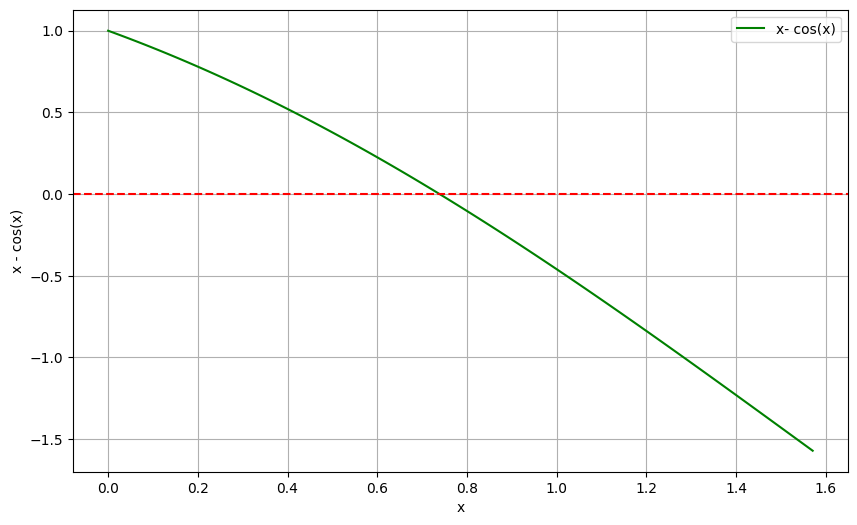

In [4]:
x = np.linspace(0,np.pi/2,100) #Creamos un array con los valores de x
plt.figure(figsize = (10,6))
plt.plot(x , cos(x), 'g-',label = 'x- cos(x)' ) #Hacemos una grafica de la función
plt.xlabel('x')
plt.ylabel('x - cos(x)')
plt.axhline(y = 0 , color = 'red', linestyle = '--')#Trazamo una linea horizontal que intersecte la raiz
plt.legend() #Mostramos la leyenda
plt.grid()
plt.show() #Mostramos la graficaa


In [5]:
df = pd.DataFrame({'x': x , ' x - cos(x)' : cos(x)})

In [6]:
cercano = -abs(df[" x - cos(x)"]).min() #Miramos cual es el valor que se acerca mas a cero en la funcion
df_filtrado = df[df[" x - cos(x)"] == cercano] #Definimos el dataframe que contenga ese valor 


In [7]:
df_filtrado #impriminos

,x,x - cos(x)
47,0.745732,-0.01114


### Usando el método de Ridder encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante

In [8]:
metodo_de_Ridder(0.6,0.8,cos) #Metodo de Ridder

0.7390851332151974

In [9]:
bisect(cos,0.6,0.8) #Bisección

0.7390851332151214

In [10]:
newton(cos,0.6,x1 = 0.8) #Secante

0.7390851332151607

### Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

In [13]:
def metodo_de_Ridder(epsilon, a=0.6, b=0.8, f=cos, Max_iter = 1000000):
  '''
    Esta funcion calcula las iteraciones que se demora el metodo en encontrar
    las raices de una función
    Entrada: 
    a y b : extremos del intervalo donde esta la raiz
    f: función
    epsilon: Tolerancia
    Max_iter : maximo de iteraciones

    Salida:
    i = numero de iteraciones que se demora el metodo en encotrar la raiz

    errores:
    el intervalo no contiene la raiz
    la correxión exponencial es cero
    el maximo de iteraciones ha sido alcanzado
    
  '''
    
  if f(a)*f(b)>= 0: #Verificamos si el intervalo es correcto
    raise ValueError('el intervalo es incorrecto')

  else:

    for i in range(Max_iter):

      m = (a + b) / 2 #Calculamos el punto medio

      #Calcular la corrección exponencial
      s = np.sqrt((f(m)** 2) -(f(a)*f(b))) #Calculamos s

      if s == 0: #miramos si s = 0, si no no podemos continuar con el metodo
        raise ValueError('el intervalo no permite continuar con el metodo')

      x =  m + (((m - a) * f(m))/s * np.sign(f(a)-f(b))) #Calculamos x

      #miramos si se cumple la tolerancia
      if abs(f(x)) < epsilon:#or abs(b-a)< delta:
        return i

      if f(m)*f(x) < 0: # si no miramos si el intervalo entre m y x contiene la raiz

          a = m
          b = x

      else : #Si no actualizamos los valores dependiendo del signo de la multiplicacion de f(a)*f(x)
        if f(a)*f(x) < 0:
          b = x
        if f(b)*f(x) < 0:
          a = x

    raise RuntimeError('Maximo de iteraciones alcanzado')

In [14]:
tol = np.logspace(-1, -20, 20) #Definimos las tolerancias

In [15]:
iteraciones = [] #Hacemos una lista para guardar el numero de iteraciones
for i in tol:
    iteraciones.append(metodo_de_Ridder(i))

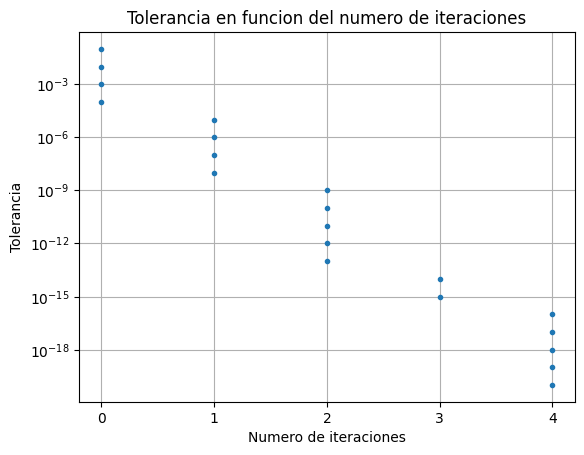

In [16]:
#Graficamos
plt.title('Tolerancia en funcion del numero de iteraciones')
plt.semilogy(iteraciones,tol, '.')
plt.xlabel('Numero de iteraciones')
plt.xticks(np.arange(0,5,1))
plt.ylabel('Tolerancia')
plt.grid()
plt.show()

Se puede decir que el metodo no demara en converger, es muy eficiente.

#2

**(60 puntos)** En óptica, cuando un rayo de luz atraviesa la interfaz entre dos medios con diferentes índices de refracción, su dirección cambia según la ley de Snell. Para el caso de un prisma triangular, cuando un rayo emerge después de dos refracciones, el ángulo de desviación total $\delta$ está dado por:

$$\delta(\theta_i) = \theta_i + \arcsin\left(n\sin\left(A - \arcsin\left(\frac{\sin\theta_i}{n}\right)\right)\right) - A$$

donde $\theta_i$ es el ángulo de incidencia, $n$ es el índice de refracción del prisma y $A$ es el ángulo del prisma.

La derivada de esta función con respecto al ángulo de incidencia $\theta_i$ es:

$$\frac{d\delta}{d\theta_i} = 1 - \frac{\cos\theta_i \cdot \cos(A-\theta_r)}{\cos\theta_r \cdot \sqrt{1-n^2\sin^2(A-\theta_r)}}$$

donde $\theta_r = \arcsin\left(\frac{\sin\theta_i}{n}\right)$ es el ángulo de refracción en la primera interfaz.

Considere un prisma de vidrio crown con $n = 1.52$ y $A = 60°$.

### Parte A:
* Escriba una función explicita y documentada para $\frac{d\delta}{d\theta_i}$

* Realice un gráfico para $\frac{d\delta}{d\theta_i}$ y encuentre el ángulo de incidencia $\theta_i$ que produce el ángulo de desviación mínimo para $\theta_i \in [30°, 80°]$.

* Use el método de Newton-Raphson (sin derivada) y el método de la secante para hallar el ángulo de desviación mínimo.


### Parte B:
* Determine el ángulo crítico $\theta_c$ para el cual el rayo comienza a experimentar reflexión interna total en la segunda interfaz del prisma. Esta condición ocurre cuando:

$$\sin(A - \theta_r) = \frac{1}{n}$$

* Resuelva numéricamente la ecuación anterior para encontrar el ángulo de incidencia $\theta_i$ correspondiente a este ángulo crítico, utilizando el método de la bisección.





### Parte A

* Escriba una función explicita y documentada para $\frac{d\delta}{d\theta_i}$

In [17]:
def d_angulo_de_desviacion(Theta_i, n=1.52, A = np.pi/3 ):
  ''' 
  Esta funcion calcula la derivada de la funcion 
  del angulo de desviacion total
  Entrada:
  angulo de incidencia : Theta_i
  indice de refraccion : n
  Angulo el prisma : A 

  Salida:
  valor de la derivada para el angulo de  incidencia dado
  '''
  Theta_r = np.arcsin(np.sin(Theta_i)/n) #Definimos el angulo de refraccion

  Numerador = np.cos(Theta_i)*np.cos(A - Theta_r) #Calculamos el numerador de la funcion

  Denominador = np.cos(Theta_r) * np.sqrt(1- (n * np.sin(A - Theta_r))**2) #Calculamos el denominador de la función

  return 1- Numerador/Denominador #Retornamos el valor


* Realice un gráfico para $\frac{d\delta}{d\theta_i}$ y encuentre el ángulo de incidencia $\theta_i$ que produce el ángulo de desviación mínimo para $\theta_i \in [30°, 80°]$.

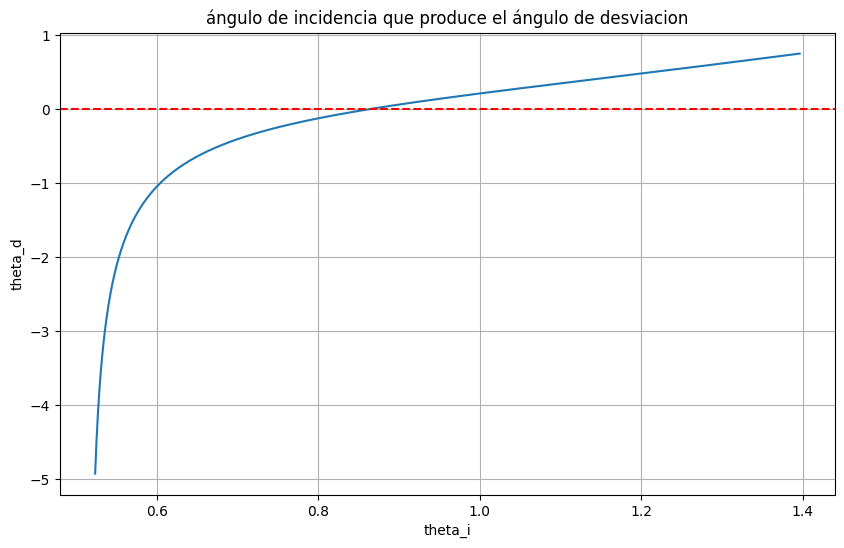

In [18]:
Theta = np.linspace(np.deg2rad(30),np.deg2rad(80),1000) #Hacemos un array con los valores de los angulos
plt.figure(figsize=(10,6))#Le damos tamaño a la imagen
plt.title('ángulo de incidencia que produce el ángulo de desviacion') #Elegimos un titulo
plt.plot(Theta,d_angulo_de_desviacion(Theta))#Graficamos
plt.xlabel('theta_i') #Le damos titulo a los ejes
plt.ylabel('theta_d')
plt.axhline(y=0, color = 'red', linestyle = '--') #Trazamos una linea horizontal 
plt.grid()

* Use el método de Newton-Raphson (sin derivada) y el método de la secante para hallar el ángulo de desviación mínimo.

In [19]:
newton(d_angulo_de_desviacion, 1) #Angulo de incidencia que produce angulo de desviacion minimo con newton Rapson

0.8633131150155533

In [20]:
newton(d_angulo_de_desviacion,0.8 , x1 = 1 ) #Angulo de incidencia minimo usando secante

0.8633131150155534

### Parte B

* Determine el ángulo crítico $\theta_c$ para el cual el rayo comienza a experimentar reflexión interna total en la segunda interfaz del prisma. Esta condición ocurre cuando:

$$\sin(A - \theta_r) = \frac{1}{n}$$


In [21]:
def angulo_critico(T,A = np.pi/3 ,n= 1.52): #Igualamos a cero para el valor que queremos encontrar
  return np.sin(A - T)- 1/n

In [22]:
print(f' el angulo critico es {np.rad2deg(newton(angulo_critico, 1)):.2f}°, usando Newton Rahson') #Encontramos el angulo critico

 el angulo critico es 18.86°, usando Newton Rahson


 - Resuelva numéricamente la ecuación anterior para encontrar el ángulo de incidencia $\theta_i$
   correspondiente a este ángulo crítico, utilizando el método de la bisección

In [24]:
def d_angulo_de_desviacion_1(Theta_i, A_c = newton(angulo_critico, 1),   n =  1.52, A = np.pi/3 ):
  ''' 
  Esta funcion se usara para encontrar el angulo de incidencia, para cierto angulo critico,
  la función esta igualada a cero para usar los metodos de raices 
  Entrada:
  angulo de incidencia : Theta_i
  indice de refraccion : n
  Angulo el prisma : A 
  Angulo critico

  Salida:
  valor de la derivada para el angulo de  incidencia dado menos
  el valor del angulo critico
  '''
  Theta_r = np.arcsin(np.sin(Theta_i)/n) #Definimos el angulo de refraccion

  Numerador = np.cos(Theta_i)*np.cos(A - Theta_r) #Calculamos el numerador de la funcion

  Denominador = np.cos(Theta_r) * np.sqrt(1- (n * np.sin(A - Theta_r))**2) #Calculamos el denominador de la función

  return 1- Numerador/Denominador - A_c #Retornamos el valor para cada angulo de incidencia 

In [25]:
print(f'el angulo de incidencia para el angulo critico: {np.rad2deg(newton(angulo_critico, 1)):.2f}°\nes {np.rad2deg(bisect(d_angulo_de_desviacion_1, 1, 2)):.2f}°') 
#Calculamos el angulo de incidencia usando biseccion

el angulo de incidencia para el angulo critico: 18.86°
es 62.22°
